# Neuron Network for image recognition using MNIST dataset

MNIST dataset is availabel at Keras datasets module. It contains 60000 training images and 10000 test images.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # method returns 2 tuples of Numpy arrays

In [3]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
x_train[0].shape # just checking the shape of a single image

(28, 28)

In [5]:
# convert target data to categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# reshape input data
print(x_train.shape)
x_train = np.reshape(x_train, (60000, 784)) # 60000 images. Flatten only every image 28x28=784, not the whole array.
x_train.shape

(60000, 28, 28)


(60000, 784)

In [7]:
# reshape input data
print(x_test.shape)
x_test = np.reshape(x_test, (10000, 784))
x_test.shape

(10000, 28, 28)


(10000, 784)

In [8]:
# train model
# keep the history in log

log = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# the accuracy is high from the first epoch.
# It is because there is a huge amount of training instances (60000 images), so model already run 60000 times
# the more instances the better

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6108 - accuracy: 0.8885 - val_loss: 0.5708 - val_accuracy: 0.8999
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3406 - accuracy: 0.9258 - val_loss: 0.3007 - val_accuracy: 0.9334
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2771 - accuracy: 0.9356 - val_loss: 0.2976 - val_accuracy: 0.9351
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2450 - accuracy: 0.9424 - val_loss: 0.2748 - val_accuracy: 0.9422
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2238 - accuracy: 0.9460 - val_loss: 0.2953 - val_accuracy: 0.9433
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2092 - accuracy: 0.9518 - val_loss: 0.3004 - val_accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2112 - accuracy: 0.9520 - val_loss: 0.2550 - val_accuracy:

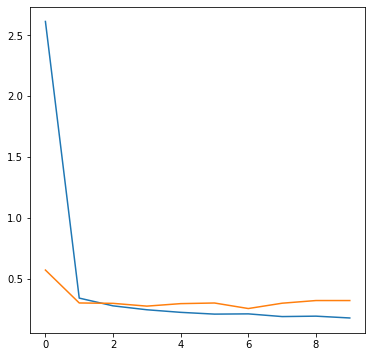

In [9]:
plt.figure(figsize=(6, 6))

plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])

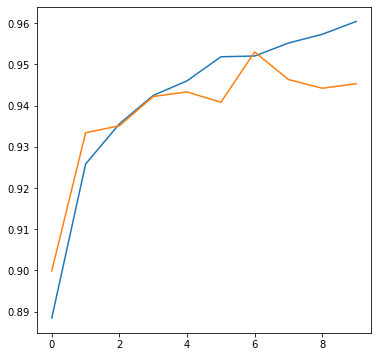

In [10]:
plt.figure(figsize=(6, 6))

plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])

# Once again about NN architecture
Within a neural network there's an input layer, that takes the input signals and passes them to the next layer.
Next, the neural network contains a series of hidden layers which apply transformations to the input data. It is within the nodes of the hidden layers that the weights are applied. For example, a single node may take the input data and multiply it by an assigned weight value, then add a bias before passing the data to the next layer. The final layer of the neural network is also known as the output layer. The output layer often tunes the inputs from the hidden layers to produce the desired numbers in a specified range.

# Weight vs. Bias
Weights and bias are both learnable parameters inside the network. A teachable neural network will randomize both the weight and bias values before learning initially begins. As training continues, both parameters are adjusted toward the desired values and the correct output.

The two parameters differ in the extent of their influence upon the input data. Simply, bias represents how far the predictions are from their intended value. 

Biases make up the difference between the function's output and its intended output. A low bias suggest that the network is making more assumptions about the form of the output, whereas a high bias value makes less assumptions about the form of the output.

Weights, on the other hand, can be thought of as the strength of the connection. Weight affects the amount of influence a change in the input will have upon the output. A low weight value will have no change on the input, and alternatively a larger weight value will more significantly change the output.

In [11]:
# display layers in a model
model.layers

# array of Layers

In [12]:
# display info about an output shape of layers
for layer in model.layers:
    print(layer.output_shape)
    
# first layer has output shape 256, second 10 

(None, 256)
(None, 10)


In [13]:
# get weights from the first layer

# https://keras.io/api/layers/base_layer/#getweights-method

weights_1 = model.layers[0].get_weights() # returns the weights of the layer as a list of NumPy arrays.

print('Lenght of list: ', len(weights_1))

# a Dense layer returns a list of two values: per-output weights and the bias value

Lenght of list:  2


In [14]:
# display weights in Dense hidden layer (there are 256 neurons (units), all of them have 784 weights)

print('shape of weights array: ', weights_1[0].shape)
# shape is 2d array with 784 arrays each of size 256
# inner array contains weights associated with inputs. Each input goes to 256 units in hidden layer, so it has 256 weights.

print(weights_1[0][0]) 

shape of weights array:  (784, 256)
[ 0.07381928  0.01984593  0.05081892 -0.02725484 -0.06141549 -0.02191065
  0.0595839   0.04098856 -0.0626848  -0.03068267 -0.04182937  0.0711232
  0.06897986 -0.02647906  0.05055211  0.00084851 -0.07350358 -0.02227387
  0.0062999  -0.0179495  -0.00358997 -0.03198221  0.05342859  0.01645721
  0.00138472  0.04588809 -0.0091437  -0.07167069  0.00124633  0.0595392
  0.04669905  0.01120459  0.02019088 -0.00754816  0.00347108 -0.06720203
 -0.02020308 -0.00596037 -0.06461236 -0.0392837  -0.04023341 -0.04600484
 -0.068887    0.06425671  0.06129208  0.00884996 -0.0425836   0.04382989
  0.01502112  0.02364273 -0.03521466 -0.07090641  0.01638509  0.00956294
 -0.06198495 -0.03548557  0.00425485 -0.01154409 -0.01512451  0.02653781
  0.05084671  0.01427696 -0.00842532 -0.03359608 -0.03201124  0.06139861
 -0.02662304  0.04477398 -0.01333451  0.04705212  0.00692191  0.04590723
 -0.03905587  0.01017722 -0.03020798  0.05976617 -0.06534538  0.05601624
 -0.00270689  0.0

In [15]:
# display weights in Dense hidden layer that belongs to the first unit in hidden layer
# take first item from each inner array

unit_weights = np.array([])

for inner_arr in weights_1[0]:
    unit_weights = np.append(unit_weights, inner_arr[0])
    
print('Number of weights: ', len(unit_weights))
print('First 10 weights: ', unit_weights[0:10])

Number of weights:  784
First 10 weights:  [ 0.07381928 -0.02848833 -0.04910088  0.06731418 -0.03489225 -0.01911099
  0.05861685 -0.02322143 -0.01940621  0.00890911]


In [16]:
# display bias of the first neuron in Dense hidden layer (there are 256 neurons, all of them have 1 bias)

print('Number of all biasis: ', len(weights_1[1]))
print(weights_1[1][0])


Number of all biasis:  256
-0.034120575


In [17]:
# get weights of second layer

weights_2 = model.layers[1].get_weights() # returns the weights of the layer as a list of Numpy arrays.

print('Lenght of list: ', len(weights_2))

Lenght of list:  2


In [18]:
unit_weights_2 = np.array([])

for inner_arr in weights_2[0]:
    unit_weights_2 = np.append(unit_weights_2, inner_arr[0])
    
print('Number of weights: ', len(unit_weights_2))
print('First 15 weights: ', unit_weights_2[0:15])

Number of weights:  256
First 15 weights:  [ 0.07570875  0.08601671 -0.18172081 -0.11146076 -0.01450309 -0.15043087
  0.00309885  0.07367884  0.00449659 -0.01191933  0.08320311 -0.14177044
  0.0891301   0.08154213  0.12576182]


In [19]:
print('Number of all biasis: ', len(weights_2[1]))
print(weights_2[1][0])

Number of all biasis:  10
0.9606241


In [20]:
# display configuration of first layer

model.layers[0].get_config()

{'name': 'dense',
 'trainable': True,
 'batch_input_shape': (None, 784),
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [21]:
model.layers[1].get_config()

{'name': 'dense_1',
 'trainable': True,
 'dtype': 'float32',
 'units': 10,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}